# SVM (Support Vector Machine)

O Support Vector Machine (SVM) é um algoritmo de aprendizado de máquina supervisionado amplamente utilizado para problemas de classificação e regressão. O SVM busca encontrar o hiperplano ótimo que separa os dados de diferentes classes com a maior margem possível, ou seja, maximiza a distância entre os pontos de dados de cada classe e o hiperplano separador.
Conceitos Fundamentais do SVM:

* **Hiperplano Ótimo**: Em espaços de alta dimensionalidade, um hiperplano é uma subdimensão que divide o espaço em duas metades. No contexto do SVM, o hiperplano ótimo é aquele que separa as classes de maneira mais eficaz.

* **Margem Máxima**: A margem é a distância entre o hiperplano separador e os pontos de dados mais próximos de cada classe. O SVM maximiza essa margem para melhorar a capacidade de generalização do modelo.

* **Vetores de Suporte**: São os pontos de dados que estão mais próximos do hiperplano separador. Eles são cruciais, pois definem a posição e a orientação do hiperplano. Alterações nesses pontos podem mudar completamente o hiperplano.

* **Kernel Trick**: Muitas vezes, os dados não são linearmente separáveis no espaço original. O SVM utiliza funções kernel para mapear os dados para um espaço de dimensão superior, onde é mais provável que sejam linearmente separáveis. Os kernels comuns incluem:
    - Linear: Usado quando os dados são linearmente separáveis.
    - Polinomial: Mapeia os dados para um espaço polinomial de dimensão superior.
    - RBF (Radial Basis Function): Também conhecido como kernel gaussiano, é eficaz em casos onde a separação é complexa.

---

Introdução ao Dataset

Neste projeto, utilizaremos o **Pima Indians Diabetes Dataset**, disponível no Kaggle. Este conjunto de dados é amplamente utilizado para problemas de classificação binária em aprendizado de máquina.
Descrição do Dataset:

- Objetivo: Prever se uma paciente tem diabetes com base em certas medições diagnósticas.

- Contexto: O conjunto de dados foi extraído de uma população específica (mulheres de 21 anos ou mais da etnia Pima Indian), que apresenta alta predisposição genética ao diabetes. Isso torna o estudo mais focado e relevante para essa população.

Atributos do Dataset:

O dataset contém 768 observações com 8 características independentes e 1 variável alvo:

* Pregnancies: Número de vezes grávida.
* Glucose: Concentração de glicose plasmática em jejum.
* BloodPressure: Pressão arterial diastólica (mm Hg).
* SkinThickness: Espessura da dobra cutânea do tríceps (mm).
* Insulin: Nível de insulina sérica de 2 horas (mu U/ml).
* BMI: Índice de Massa Corporal (peso em kg / (altura em m)^2).
* DiabetesPedigreeFunction: Função de pedigree de diabetes (uma medida da * hereditariedade).
* Age: Idade (anos).
* Outcome: Classe de diagnóstico (0: não diabética, 1: diabética).

Desafios e Considerações:

- Valores Ausentes Representados como Zeros: Algumas características possuem valores zero que não são fisiologicamente possíveis (por exemplo, pressão arterial zero). Esses zeros representam valores ausentes que precisam ser tratados durante a análise.

- Desbalanceamento de Classes: A proporção entre as classes pode não ser equilibrada, o que pode afetar o desempenho do modelo e requer técnicas específicas para lidar com esse desbalanceamento.

---

In [1]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset
!unzip diabetes-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 12.7MB/s]
Archive:  diabetes-dataset.zip
  inflating: diabetes.csv            


# Importação das Bibliotecas Necessárias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando os dados

In [3]:
# Carregar o dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Análise Exploratória de Dados (AED)

Vamos explorar o conjunto de dados para entender melhor suas características.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Estatística Descritivas

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualização de Dados

<Axes: xlabel='Outcome', ylabel='count'>

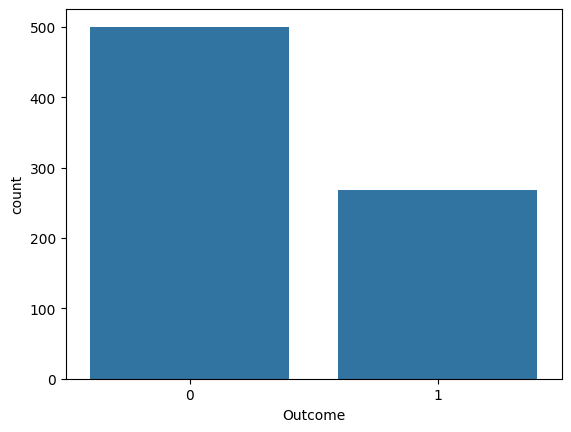

In [6]:
# Distribuição das classes
sns.countplot(x='Outcome', data=df)

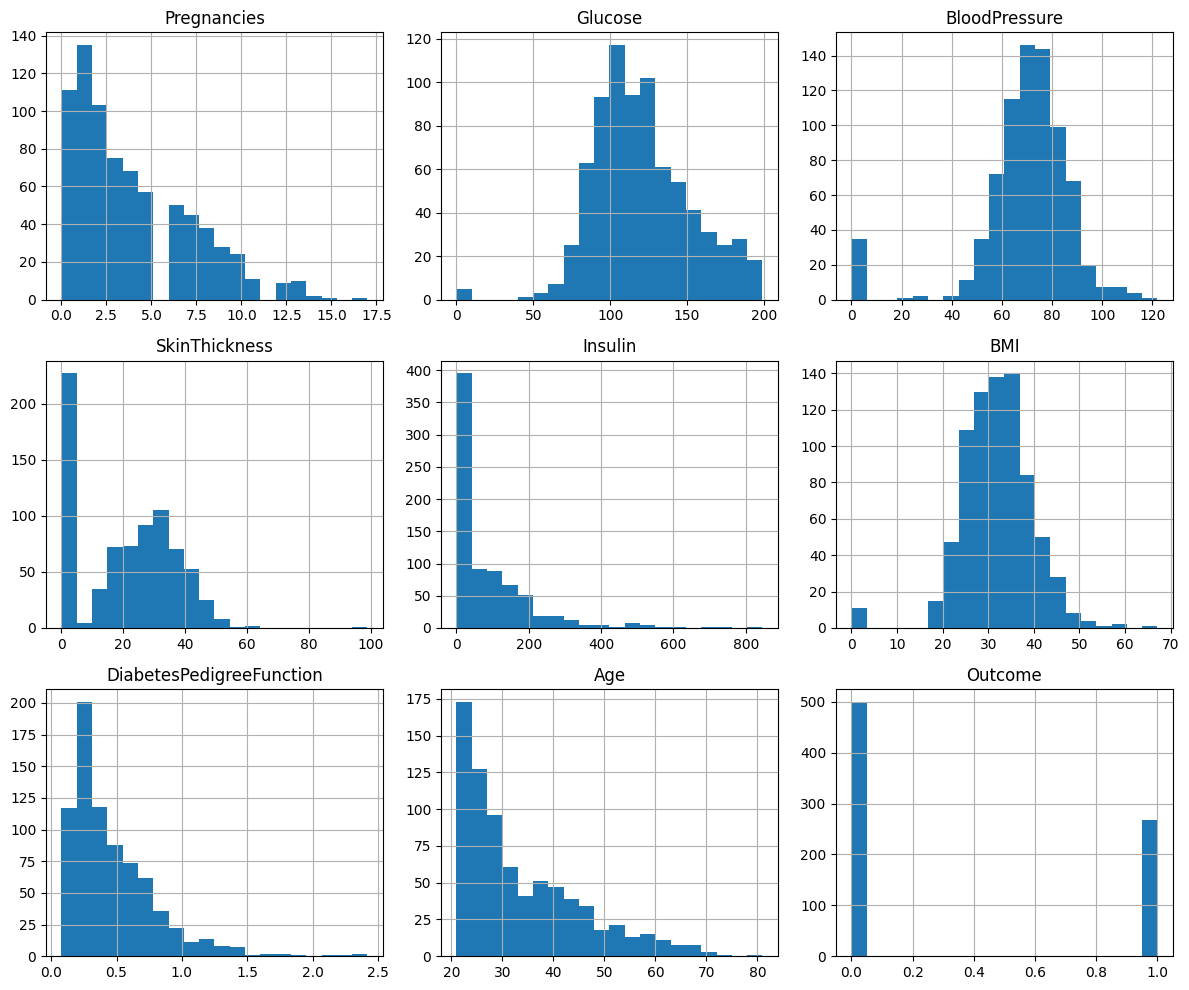

In [16]:
# Análise das Distribuições das Variáveis
# Plotando histogramas para cada variável para visualizar a distribuição dos dados
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

# Divisão em Conjunto de Treino e Teste

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Normalização dos Dados

Aplicamos a normalização apenas nos dados de treino e usamos os mesmos parâmetros para os dados de teste.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Treinamento do Modelo SVM

In [9]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)


SVC()

# Avaliação do Modelo

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



<Axes: >

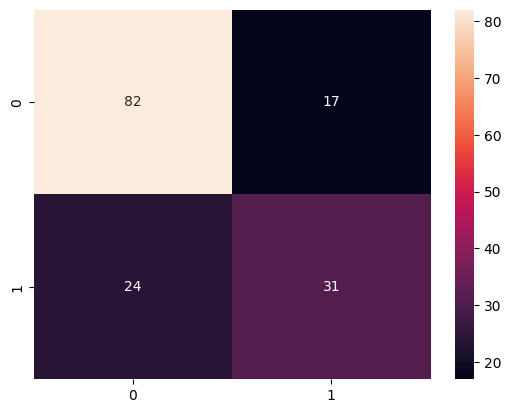

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svc_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)



# Salvando o Modelo para Deploy

In [14]:
import joblib

# Salvar o modelo
joblib.dump(svc_model, 'svm_diabetes_model.pkl')
# Salvar o scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Usando o modelo salvo

In [15]:
import joblib
import numpy as np

# Carregar o modelo e o scaler salvos
model = joblib.load('svm_diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

# Novo dado para predição (substitua pelos valores reais)
# As características devem estar na mesma ordem que no conjunto de treinamento
# Exemplo: [Número de Gravidezes, Glicose, Pressão Arterial, Espessura da Pele, Insulina, IMC, DiabetesPedigreeFunction, Idade]
new_data = np.array([[2, 120, 70, 30, 100, 25.0, 0.5, 24]])

# Escalar o novo dado usando o scaler carregado
new_data_scaled = scaler.transform(new_data)

# Fazer a predição com o modelo carregado
prediction = model.predict(new_data_scaled)

# Interpretar o resultado
if prediction[0] == 1:
    print("O modelo prevê que o paciente TEM diabetes.")
else:
    print("O modelo prevê que o paciente NÃO TEM diabetes.")


O modelo prevê que o paciente NÃO TEM diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
